### Stock Market Prediction And Forecasting Using Stacked LSTM

Source" https://www.youtube.com/watch?v=H6du_pfuznE&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm&index=23

In [ ]:
### Keras and Tensorflow >2.0

In [2]:
pip install pandas-datareader

     |████████████████████████████████| 107 kB 5.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
### Data Collection
import pandas_datareader as pdr
key="1a95f2ec83e5bcefd4bb19a6a838311d9cf4eebd"

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61,67649387,24.397857,24.402026,23.622035,23.763304,270597548,0.0,1.0
1,AAPL,2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75,55790992,23.786463,24.513651,23.716987,24.490493,223163968,0.0,1.0
2,AAPL,2016-01-06 00:00:00+00:00,100.70,102.370,99.87,100.56,68457388,23.320970,23.707723,23.128752,23.288548,273829552,0.0,1.0
3,AAPL,2016-01-07 00:00:00+00:00,96.45,100.130,96.43,98.68,81094428,22.336719,23.188965,22.332087,22.853161,324377712,0.0,1.0
4,AAPL,2016-01-08 00:00:00+00:00,96.96,99.110,96.76,98.55,70798016,22.454829,22.952744,22.408511,22.823055,283192064,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-12-22 00:00:00+00:00,131.88,134.405,129.6500,131.61,169351825,131.88,134.405,129.6500,131.61,169351825,0.0,1.0
1253,AAPL,2020-12-23 00:00:00+00:00,130.96,132.430,130.7800,132.16,88223692,130.96,132.430,130.7800,132.16,88223692,0.0,1.0
1254,AAPL,2020-12-24 00:00:00+00:00,131.97,133.460,131.1000,131.32,54930064,131.97,133.460,131.1000,131.32,54930064,0.0,1.0
1255,AAPL,2020-12-28 00:00:00+00:00,136.69,137.340,133.5100,133.99,123124632,136.69,137.340,133.5100,133.99,123124632,0.0,1.0
1256,AAPL,2020-12-29 00:00:00+00:00,134.87,138.789,134.3409,138.05,121047324,134.87,138.789,134.3409,138.05,121047324,0.0,1.0


In [22]:
df1=df.reset_index()['close']

In [23]:
df1

0       105.35
1       102.71
2       100.70
3        96.45
4        96.96
         ...  
1252    131.88
1253    130.96
1254    131.97
1255    136.69
1256    134.87
Name: close, Length: 1257, dtype: float64

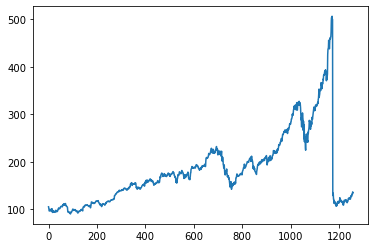

In [24]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [25]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [26]:
import numpy as np

In [27]:
df1

0       105.35
1       102.71
2       100.70
3        96.45
4        96.96
         ...  
1252    131.88
1253    130.96
1254    131.97
1255    136.69
1256    134.87
Name: close, Length: 1257, dtype: float64

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
np.array(df1)  # stored as rows

array([105.35, 102.71, 100.7 , ..., 131.97, 136.69, 134.87])

In [29]:
np.array(df1).reshape(-1,1)  #reshape is applied to convert into columns

array([[105.35],
       [102.71],
       [100.7 ],
       ...,
       [131.97],
       [136.69],
       [134.87]])

In [31]:
print(df1)   # values are between 0 and 1

[[0.03610343]
 [0.02975346]
 [0.02491882]
 ...
 [0.10013229]
 [0.11148527]
 [0.10710764]]


In [35]:
##splitting dataset into train and test split
# For timeseries data (like stock price) the train, test split should happen in order since the next day market price
#depends on previous days or months market price. Hence we should not do it randomy and we should do it ourself
#like below. 

training_size=int(len(df1)*0.65) # first 65% data is train data. Row Index will select the records in order only. 

test_size=len(df1)-training_size

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [37]:
training_size,test_size

(817, 440)

In [34]:
train_data

array([[0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.01515334],
       [0.01871317],
       [0.01423933],
       [0.01371016],
       [0.01573061],
       [0.01046302],
       [0.01385448],
       [0.01544197],
       [0.01580277],
       [0.0152736 ],
       [0.02450992],
       [0.02503909],
       [0.02684305],
       [0.03047505],
       [0.02773301],
       [0.02571257],
       [0.02592904],
       [0.02604931],
       [0.028

In [41]:
import numpy
# convert an array of values into a dataset matrix.
# This function is decoded below. 

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
    
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
        
	return numpy.array(dataX), numpy.array(dataY)


# this function will prepare the train test data as below. In image only 3 days data is take i.e 3 columns (f1,f2,f3) are
# created. But in above program it will be f1 to f100 since the step = 100

<img src="Timeseries Data - Train Test Split.png" height=800 width=800/>

In [42]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100  # how many previous days data model should look to predict next day. The more its better. 

X_train, y_train = create_dataset(train_data, time_step)

X_test, ytest = create_dataset(test_data, time_step)

In [47]:
range(len(train_data)-time_step-1)  # 817-100-1 = 716

range(0, 716)

In [49]:
0+time_step

100

In [53]:
train_data[0:(0+time_step),0]  # 100 days data , taking as train data 

array([0.03610343, 0.02975346, 0.02491882, 0.01469633, 0.01592303,
       0.01969934, 0.02313891, 0.01695731, 0.02208058, 0.01633193,
       0.01520144, 0.01551413, 0.01433554, 0.02665063, 0.02188815,
       0.02321106, 0.0074083 , 0.00901984, 0.01683704, 0.01464823,
       0.00995791, 0.0144558 , 0.01505713, 0.00885147, 0.01123271,
       0.01118461, 0.0094528 , 0.00808178, 0.00877931, 0.01515334,
       0.01871317, 0.01423933, 0.01371016, 0.01573061, 0.01046302,
       0.01385448, 0.01544197, 0.01580277, 0.0152736 , 0.02450992,
       0.02503909, 0.02684305, 0.03047505, 0.02773301, 0.02571257,
       0.02592904, 0.02604931, 0.02867108, 0.02929645, 0.03425135,
       0.03759471, 0.03718581, 0.03747444, 0.03745039, 0.03939868,
       0.03797956, 0.03687312, 0.03571858, 0.04170776, 0.04622971,
       0.04485869, 0.04726398, 0.04998196, 0.04683103, 0.04959711,
       0.04377631, 0.04406494, 0.04493085, 0.04834636, 0.05219483,
       0.05233915, 0.04692724, 0.0412267 , 0.03985568, 0.04038

In [54]:
train_data[0 + time_step, 0]  # 101st day data , taking as test data 

0.024221286831028227

In [ ]:
# the same split contineous to prepare x train, y train, x testt and y test

In [56]:
print(X_train.shape)  # 716 rows with 100 columns (i.e previous 100 days data is created as columns)

print(y_train.shape)

(716, 100)
(716,)


In [57]:
print(X_test.shape)

print(ytest.shape)

(339, 100)
(339,)


In [60]:
# reshape input to be [# of samples, time steps, # of features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [61]:
### Create the Stacked LSTM model (Stacked means adding one on top of other)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # first hidden layer

model.add(LSTM(50,return_sequences=True)) # adding 2nd hidden layer (stacking)

model.add(LSTM(50)) # adding 3rd hidden layer (stacking)

model.add(Dense(1)) # adding 4th hidden layer (stacking)

model.compile(loss='mean_squared_error',optimizer='adam')


In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 189ms/step - loss: 0.0144 - val_loss: 0.0512
Epoch 2/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0028 - val_loss: 0.0196
Epoch 3/100
12/12 [==============================] - 1s 88ms/step - loss: 7.6620e-04 - val_loss: 0.0227
Epoch 4/100
12/12 [==============================] - 1s 89ms/step - loss: 5.2548e-04 - val_loss: 0.0206
Epoch 5/100
12/12 [==============================] - 1s 89ms/step - loss: 3.4122e-04 - val_loss: 0.0183
Epoch 6/100
12/12 [==============================] - 1s 96ms/step - loss: 2.9943e-04 - val_loss: 0.0182
Epoch 7/100
12/12 [==============================] - 1s 91ms/step - loss: 2.7124e-04 - val_loss: 0.0177
Epoch 8/100
12/12 [==============================] - 1s 90ms/step - loss: 2.8426e-04 - val_loss: 0.0171
Epoch 9/100
12/12 [==============================] - 1s 88ms/step - loss: 2.6448e-04 - val_loss: 0.0167
Epoch 10/100
12/12 [==============================] - 1s 91ms/step - lo

Epoch 79/100
12/12 [==============================] - 1s 97ms/step - loss: 1.3152e-04 - val_loss: 0.0091
Epoch 80/100
12/12 [==============================] - 1s 96ms/step - loss: 1.1272e-04 - val_loss: 0.0084
Epoch 81/100
12/12 [==============================] - 1s 98ms/step - loss: 1.0636e-04 - val_loss: 0.0086
Epoch 82/100
12/12 [==============================] - 1s 94ms/step - loss: 1.0740e-04 - val_loss: 0.0078
Epoch 83/100
12/12 [==============================] - 1s 94ms/step - loss: 1.3903e-04 - val_loss: 0.0089
Epoch 84/100
12/12 [==============================] - 1s 93ms/step - loss: 1.0978e-04 - val_loss: 0.0079
Epoch 85/100
12/12 [==============================] - 1s 94ms/step - loss: 1.1376e-04 - val_loss: 0.0083
Epoch 86/100
12/12 [==============================] - 1s 96ms/step - loss: 1.0621e-04 - val_loss: 0.0081
Epoch 87/100
12/12 [==============================] - 1s 103ms/step - loss: 1.0230e-04 - val_loss: 0.0079
Epoch 88/100
12/12 [==============================] - 

In [66]:
import tensorflow as tf

In [67]:
tf.__version__

'2.4.0'

In [68]:
### Lets Do the prediction and check performance metrics

train_predict=model.predict(X_train)

test_predict=model.predict(X_test)

In [75]:
##Transformback to original form

train_predict=scaler.inverse_transform(train_predict) # as we had scaled the data between 0 and 1, we are reversing it back so that we can get actual predicted price and compare with google (if required)

test_predict=scaler.inverse_transform(test_predict)

In [70]:
### Calculate RMSE performance metrics
import math

from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

160.9447058398635

In [71]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

265.7084387696348

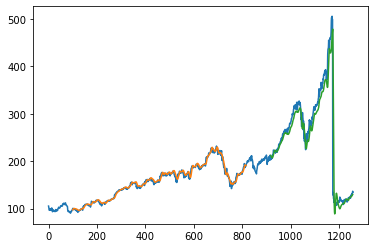

In [72]:
### Plotting 

# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1)) # original raw data
plt.plot(trainPredictPlot) # orange color, train data 
plt.plot(testPredictPlot) # green color, test data

plt.show()


## Prediction 

In [76]:
len(test_data)

440

In [77]:
x_input=test_data[340:].reshape(1,-1)  

# to predict next day rate, we need previous 100 days rate. Hence using 
# test data only we manually creating new input here. So 440 -100 = 340 

x_input.shape  # 1 row with 100 column. This is one sample record to test the prediction. 

(1, 100)

In [78]:
x_input

array([[0.85173782, 0.86727601, 0.83502105, 0.86999399, 0.88923632,
        0.88825015, 0.8853638 , 0.89455201, 0.89594708, 0.92064943,
        0.97929044, 0.99360192, 0.98366807, 1.        , 0.98544799,
        0.9834997 , 0.09308479, 0.10544799, 0.09876127, 0.07345761,
        0.07365003, 0.05407096, 0.06489477, 0.0556825 , 0.05209862,
        0.06016837, 0.06061335, 0.0524113 , 0.04810583, 0.03968731,
        0.04748046, 0.05164161, 0.04036079, 0.04300661, 0.0527721 ,
        0.05921828, 0.05712568, 0.06126278, 0.06361996, 0.05455201,
        0.06292243, 0.05488876, 0.05950692, 0.05924233, 0.06405292,
        0.08192423, 0.07398677, 0.07420325, 0.07304871, 0.06898376,
        0.06167168, 0.06535177, 0.06381239, 0.06111846, 0.0594107 ,
        0.05943476, 0.06316296, 0.05017438, 0.06008419, 0.044546  ,
        0.04432952, 0.04834636, 0.05919423, 0.06900782, 0.06819002,
        0.06248948, 0.06164762, 0.07011425, 0.06944077, 0.06956103,
        0.07206254, 0.06987372, 0.06660253, 0.06

In [79]:
list(x_input)

[array([0.85173782, 0.86727601, 0.83502105, 0.86999399, 0.88923632,
        0.88825015, 0.8853638 , 0.89455201, 0.89594708, 0.92064943,
        0.97929044, 0.99360192, 0.98366807, 1.        , 0.98544799,
        0.9834997 , 0.09308479, 0.10544799, 0.09876127, 0.07345761,
        0.07365003, 0.05407096, 0.06489477, 0.0556825 , 0.05209862,
        0.06016837, 0.06061335, 0.0524113 , 0.04810583, 0.03968731,
        0.04748046, 0.05164161, 0.04036079, 0.04300661, 0.0527721 ,
        0.05921828, 0.05712568, 0.06126278, 0.06361996, 0.05455201,
        0.06292243, 0.05488876, 0.05950692, 0.05924233, 0.06405292,
        0.08192423, 0.07398677, 0.07420325, 0.07304871, 0.06898376,
        0.06167168, 0.06535177, 0.06381239, 0.06111846, 0.0594107 ,
        0.05943476, 0.06316296, 0.05017438, 0.06008419, 0.044546  ,
        0.04432952, 0.04834636, 0.05919423, 0.06900782, 0.06819002,
        0.06248948, 0.06164762, 0.07011425, 0.06944077, 0.06956103,
        0.07206254, 0.06987372, 0.06660253, 0.06

In [82]:
temp_input=list(x_input)

In [83]:
temp_input[0].tolist()

[0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059242333132892344,
 0.06405291641611544,
 0.08192423331328924,
 0.07398677089597111,

In [ ]:
temp_input=temp_input[0].tolist()

In [440]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [84]:
# demonstrate prediction for next 10 days
# can see the video to understand below code. 

from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<30):
    
    if(len(temp_input)>100):
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10063446]
2
[0.10063446]
3
[0.10063446]
4
[0.10063446]
5
[0.10063446]
6
[0.10063446]
7
[0.10063446]
8
[0.10063446]
9
[0.10063446]
10
[0.10063446]
11
[0.10063446]
12
[0.10063446]
13
[0.10063446]
14
[0.10063446]
15
[0.10063446]
16
[0.10063446]
17
[0.10063446]
18
[0.10063446]
19
[0.10063446]
20
[0.10063446]
21
[0.10063446]
22
[0.10063446]
23
[0.10063446]
24
[0.10063446]
25
[0.10063446]
26
[0.10063446]
27
[0.10063446]
28
[0.10063446]
29
[0.10063446]
30
[0.10063446]
31
[[0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776], [0.10063446313142776]

In [89]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [86]:
import matplotlib.pyplot as plt

In [90]:
len(df1)

1257

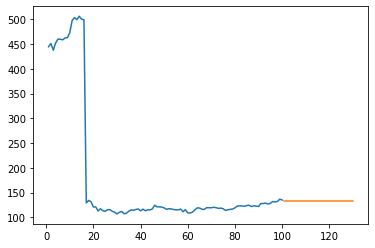

In [93]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))   # 1257 - 100 = 1157 (previous 100 day data)
plt.plot(day_pred,scaler.inverse_transform(lst_output))

#orange is the next 30days prediction here. 

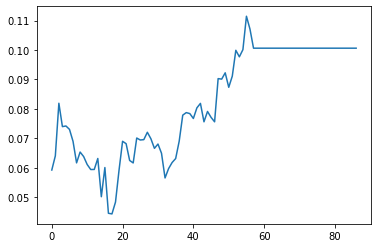

In [95]:
# to visualize the output including raw data

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [96]:
df3=scaler.inverse_transform(df3).tolist()

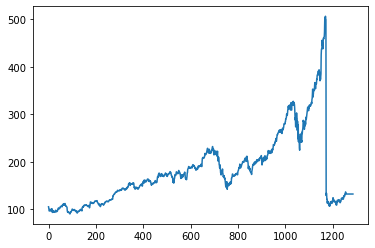

In [97]:
plt.plot(df3)